In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("analisisKMeans.csv")
df

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


In [3]:
# Algoritmo de cluster K-Means
# Seleccionando variables 
X = df.drop(["usuario","categoria"], axis=1)
X

,op,co,ex,ag,ne,wordcount
0,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945
1,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970
2,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604
3,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538
4,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645
...,...,...,...,...,...,...
135,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420
136,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625
137,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065
138,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107


In [4]:
df.head(20)

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
5,alo_oficial,33.531771,16.183958,43.211667,25.786667,11.930417,40.1354,7
6,andresiniesta8,31.851102,13.735591,47.182362,19.594331,6.905591,91.5197,7
7,andykusnetzoff,31.865118,16.588110,55.377559,36.258346,7.464646,66.2835,5
8,andyroddick,46.393488,25.451163,39.930310,16.658062,8.452791,145.1473,7
9,andy_murray,39.436667,26.135303,32.966288,32.291591,10.956591,177.5606,7


In [5]:
# Escalamos variables
# Escalado Estandar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,op,co,ex,ag,ne,wordcount
0,-1.204996,0.892279,0.165428,0.845612,0.608075,-1.383060
1,0.068161,-0.422922,-0.394646,0.178325,0.780058,-0.447063
2,-0.319303,-1.592763,-0.246459,1.537014,0.276347,-1.110001
3,-0.480900,-1.311184,1.616460,1.069976,-0.980020,-0.409877
4,-0.923095,-0.575372,1.084760,1.077410,-0.229209,-1.159287
...,...,...,...,...,...,...
135,-1.053555,-0.145512,-0.259729,1.141040,1.387254,-1.148570
136,-1.483421,-1.304366,1.085083,2.251448,1.243071,-1.148110
137,3.249513,-1.809488,-1.842747,-0.501326,-1.571194,-0.547851
138,0.848401,0.523212,-0.600469,0.011749,-0.236145,0.446541


In [6]:
X_scaled_df.describe()

,op,co,ex,ag,ne,wordcount
count,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02
mean,1.776357e-16,-2.918301e-16,-5.519394e-16,-4.314009e-16,-5.202188e-16,-1.649474e-16
std,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00
min,-1.714489e+00,-2.609433e+00,-3.082725e+00,-1.784146e+00,-2.301527e+00,-2.102942e+00
25%,-7.394496e-01,-5.584566e-01,-6.520960e-01,-7.690362e-01,-6.320070e-01,-7.293833e-01
50%,1.101766e-02,-8.806312e-02,9.680290e-02,-2.010524e-01,-5.295771e-02,-8.987017e-02
75%,5.897548e-01,5.373445e-01,6.192217e-01,7.549863e-01,5.805395e-01,4.711675e-01
max,3.249513e+00,4.599818e+00,2.662241e+00,2.315238e+00,5.276218e+00,2.658964e+00


In [7]:
# Cuantos clusters deberían existir para una mejor clasificación
# Rango óptimo 
# Método del codo (Elbow Method)
# Varianza Within 
within = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ="k-means++",
                   max_iter = 300, n_init = 10,
                   random_state=0)
    kmeans.fit(X_scaled)
    within.append(kmeans.inertia_)



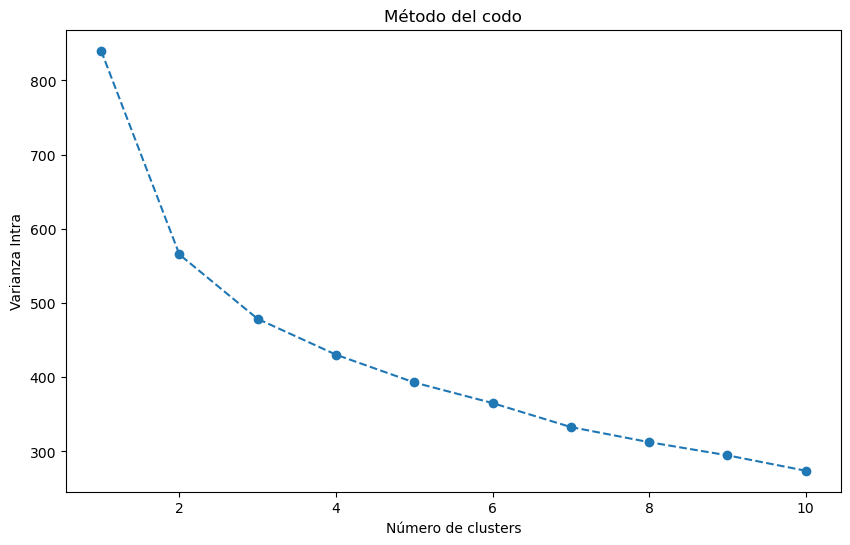

In [8]:
# Graficando el método del codo
plt.figure(figsize=(10,6))
plt.plot(range(1,11),within,marker="o",linestyle="--")
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("Varianza Intra")
plt.show()

In [9]:
# Realizar la clasificación de clusters con k=3
kmeans = KMeans(n_clusters=3, init ="k-means++",
                   max_iter = 300, n_init = 10,
                   random_state=0)
clusters = kmeans.fit_predict(X_scaled)
data_cluster = df.drop(["categoria"],axis=1).copy()
data_cluster["CLUSTER"]=clusters
data_cluster

,usuario,op,co,ex,ag,ne,wordcount,CLUSTER
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,2
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,0
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,2
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,2
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,2
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,2
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,1
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


In [10]:
# Análisis de Centroides
centroides = scaler.inverse_transform(kmeans.cluster_centers_)
data_rep = data_cluster.groupby("CLUSTER").mean(numeric_only=True)
data_rep["Conteo"]=data_cluster["CLUSTER"].value_counts()
data_rep

,op,co,ex,ag,ne,wordcount,Conteo
CLUSTER,,,,,,,
0,43.783840,27.019979,38.047874,20.259396,10.225158,130.379509,46
1,52.986825,22.993898,37.193445,16.798490,6.345138,104.085322,45
2,37.134264,19.166419,46.594136,31.035299,7.431127,64.058588,49


In [11]:
# Agregamos coordenadas de centroides para luego graficar
for i, var in enumerate(X.columns):
    data_rep[f"Centroide_{var}"]=centroides[:,i]
    
print(data_rep.reset_index())

   CLUSTER         op         co         ex         ag         ne   wordcount  \
0        0  43.783840  27.019979  38.047874  20.259396  10.225158  130.379509   
1        1  52.986825  22.993898  37.193445  16.798490   6.345138  104.085322   
2        2  37.134264  19.166419  46.594136  31.035299   7.431127   64.058588   

   Conteo  Centroide_op  Centroide_co  Centroide_ex  Centroide_ag  \
0      46     43.783840     27.019979     38.047874     20.259396   
1      45     52.986825     22.993898     37.193445     16.798490   
2      49     37.134264     19.166419     46.594136     31.035299   

   Centroide_ne  Centroide_wordcount  
0     10.225158           130.379509  
1      6.345138           104.085322  
2      7.431127            64.058588  


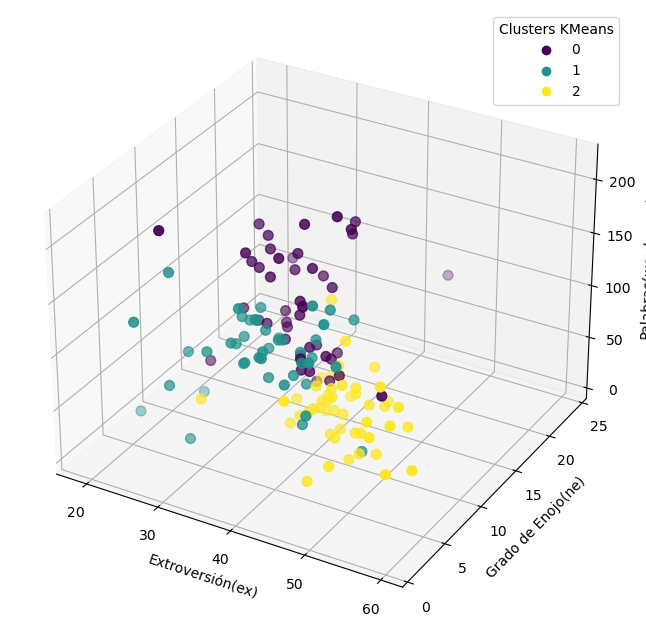

In [12]:
# Visualizando

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection="3d")
scatter = ax.scatter(data_cluster["ex"],data_cluster["ne"],
                    data_cluster["wordcount"], c=data_cluster["CLUSTER"],
                    cmap = "viridis", s = 50)
ax.legend(*scatter.legend_elements(),title="Clusters KMeans")
ax.set_xlabel("Extroversión(ex)")
ax.set_ylabel("Grado de Enojo(ne)")
ax.set_zlabel("Palabras(wordcount)")
plt.show()


In [13]:
# Perfil de usuario por cluster
# Cluster 0

# 0	43.783840	27.019979	38.047874	20.259396	10.225158	130.379509	46

"""
Hay 46 usuarios, Extroversión media alta, se enojan mas facilmente
son los que más palabras promedio por tweet utilizan 

"""


'\nHay 46 usuarios, Extroversión media alta, se enojan mas facilmente\nson los que más palabras promedio por tweet utilizan \n\n'

In [14]:
# Métricas
from sklearn.metrics import silhouette_score,davies_bouldin_score, calinski_harabasz_score

In [15]:
# Coeficiente de silueta 
silueta = silhouette_score(X_scaled,clusters)
# DB Indice
DB = davies_bouldin_score(X_scaled,clusters)
# CH Indice
CH = calinski_harabasz_score(X_scaled,clusters)

print(f"silueta: {silueta:.4f} ") # entre -1 a 1 mas cerca 1 mejor
print(f"DB : {DB:.4f}") # Mas cercano a 0 mejor
print(f"CH : {CH:.4f}") # Mayor = mejor 

silueta: 0.2425 
DB : 1.5421
CH : 51.7308


In [16]:
# Construimos KMEans con k = 4
# Realizar la clasificación de clusters con k=4
kmeans4 = KMeans(n_clusters=4, init ="k-means++",
                   max_iter = 300, n_init = 10,
                   random_state=0)
clusters4 = kmeans4.fit_predict(X_scaled)
data_cluster = df.drop(["categoria"],axis=1).copy()
data_cluster["CLUSTER"]=clusters4
data_cluster

,usuario,op,co,ex,ag,ne,wordcount,CLUSTER
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,2
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,2
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,0
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,0
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,0
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,2
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,0
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,3
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,3


In [17]:
# Coeficiente de silueta 
silueta4 = silhouette_score(X_scaled,clusters4)
# DB Indice
DB4 = davies_bouldin_score(X_scaled,clusters4)
# CH Indice
CH4 = calinski_harabasz_score(X_scaled,clusters4)

print(f"silueta: {silueta4:.4f} ") # entre -1 a 1 mas cerca 1 mejor
print(f"DB : {DB4:.4f}") # Mas cercano a 0 mejor
print(f"CH : {CH4:.4f}") # Mayor = mejor 

silueta: 0.2222 
DB : 1.5105
CH : 43.1377


In [18]:
# Cluster Jerárquico 
# 1. Clusters de subtipo Aglomerativo 
# Dendrograma 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch 

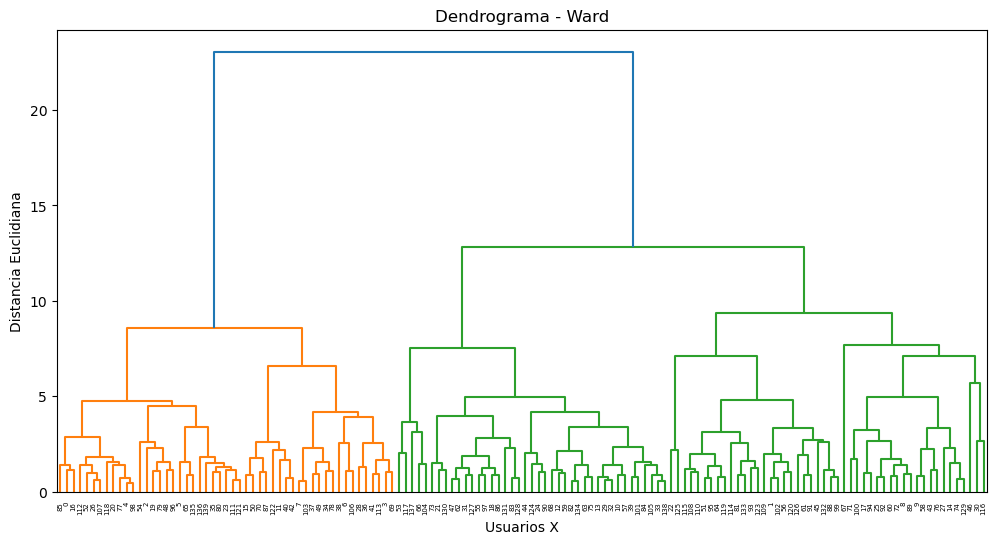

In [19]:
# Graficamos el dendrograma 
plt.figure(figsize=(12,6))
dendrograma = sch.dendrogram(sch.linkage(X_scaled,method='ward'))
plt.title("Dendrograma - Ward")
plt.xlabel("Usuarios X")
plt.ylabel("Distancia Euclidiana")
plt.show()

In [20]:
# Construir el modelo de culstering jerárquico 
modelo_aglo = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
clusters_aglo = modelo_aglo.fit_predict(X_scaled)

data_cluster_aglo = df.drop(["categoria"], axis=1).copy()
data_cluster_aglo["CLUSTER"] = clusters_aglo
data_cluster_aglo

/Users/maurodelboycespedes/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,usuario,op,co,ex,ag,ne,wordcount,CLUSTER
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,1
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,0
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,1
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,1
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,1
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,1
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,1
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,2


In [21]:
# Métricas 
silueta_aglo = silhouette_score(X_scaled,clusters_aglo)
db_aglo = davies_bouldin_score(X_scaled,clusters_aglo)
ch_aglo = calinski_harabasz_score(X_scaled,clusters_aglo)

print(f"[Aglo] Silueta", silueta_aglo )
print(f"[Aglo] DB", db_aglo )
print(f"[Aglo] CH", ch_aglo )


[Aglo] Silueta 0.2267973267509184
[Aglo] DB 1.5993812949640835
[Aglo] CH 48.42381181203452


In [22]:
# Cluster Jerárquico 
# 2. Clusters de subtipo Divisivo 
def biseccion(X,k):
    from collections import deque
    
    n = X.shape[0] # numero de observaciones
    clusters = {0:np.arange(n)} #nuemro de clusters
    next_cluster_id= 1 
    
    while len(clusters) < k:
        cluster_div = max(clusters, key=lambda c: len(clusters[c]))
        indices_div = clusters.pop(cluster_div)
        
        if len(indices_div) <=1:
            continue
            
        X_subset = X.iloc[indices_div]
        kmeans = KMeans(n_clusters=2, random_state=0).fit(X_subset)
        labels_div = kmeans.labels_
        
        clusters[cluster_div] = indices_div[labels_div==0]
        clusters[next_cluster_id] = indices_div[labels_div==1]
        next_cluster_id += 1
        
    final_labels = np.zeros(n,dtype=int)
    for cluster_id, indices in clusters.items():
        final_labels[indices] = cluster_id
        
    return final_labels

In [23]:
etiquetas_def = biseccion(X,3)

data_cluster_div = df.drop(["categoria"], axis=1).copy()
data_cluster_div["CLUSTER"] = etiquetas_def
data_cluster_div

/Users/maurodelboycespedes/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maurodelboycespedes/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,usuario,op,co,ex,ag,ne,wordcount,CLUSTER
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,0
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,2
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,0
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,0
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,0
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,0
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


In [24]:
# Métricas 
silueta_div = silhouette_score(X_scaled,etiquetas_def)
db_div = davies_bouldin_score(X_scaled,etiquetas_def)
ch_div = calinski_harabasz_score(X_scaled,etiquetas_def)

print(f"[Div] Silueta", silueta_div )
print(f"[Div] DB", db_div )
print(f"[Div] CH", ch_div )

[Div] Silueta 0.07992150166065581
[Div] DB 2.637856604421531
[Div] CH 21.206597134602834


In [26]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


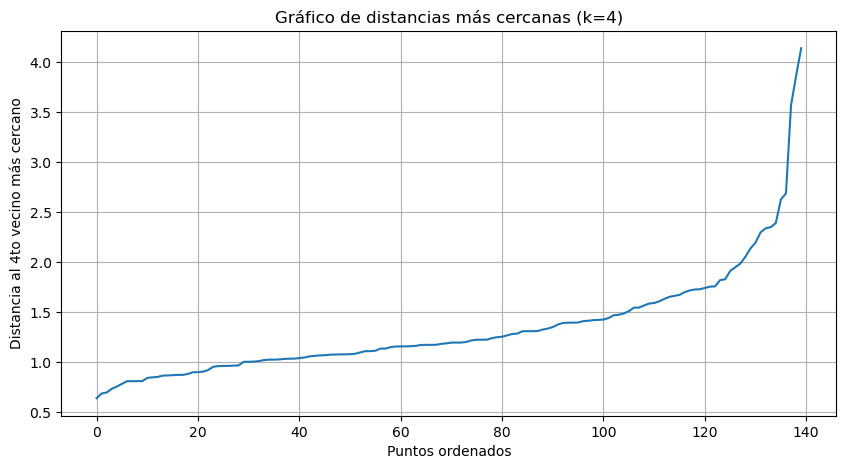

In [27]:
# Gráfico de distancias más cercanas
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Ordenamos distancias y graficamos
distances = np.sort(distances[:, 3])
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title("Gráfico de distancias más cercanas (k=4)")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al 4to vecino más cercano")
plt.grid(True)
plt.show()


In [55]:
# Ajustamos el modelo con los valores elegidos (eps debe ajustarse según el gráfico)
dbscan = DBSCAN(eps=1.25, min_samples=4)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Creamos nuevo DataFrame con clusters
data_cluster_dbscan = df.drop(["categoria"], axis=1).copy()
data_cluster_dbscan["CLUSTER"] = labels_dbscan
data_cluster_dbscan


,usuario,op,co,ex,ag,ne,wordcount,CLUSTER
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,0
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,0
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,-1
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,0
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,0
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,0
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,0
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,-1
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,0


In [56]:
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print(f"Número de clusters (sin contar ruido): {n_clusters_dbscan}")
print(f"Número de outliers: {list(labels_dbscan).count(-1)}")

# Si hay al menos 2 clusters, evaluamos métricas
if n_clusters_dbscan > 1:
    silueta_dbscan = silhouette_score(X_scaled, labels_dbscan)
    db_dbscan = davies_bouldin_score(X_scaled, labels_dbscan)
    ch_dbscan = calinski_harabasz_score(X_scaled, labels_dbscan)

    print(f"[DBSCAN] Silueta: {silueta_dbscan:.4f}")
    print(f"[DBSCAN] DB Index: {db_dbscan:.4f}")
    print(f"[DBSCAN] CH Index: {ch_dbscan:.4f}")
else:
    print("No se puede calcular métricas: menos de 2 clusters válidos.")


Número de clusters (sin contar ruido): 2
Número de outliers: 39
[DBSCAN] Silueta: 0.0848
[DBSCAN] DB Index: 5.8641
[DBSCAN] CH Index: 6.0204


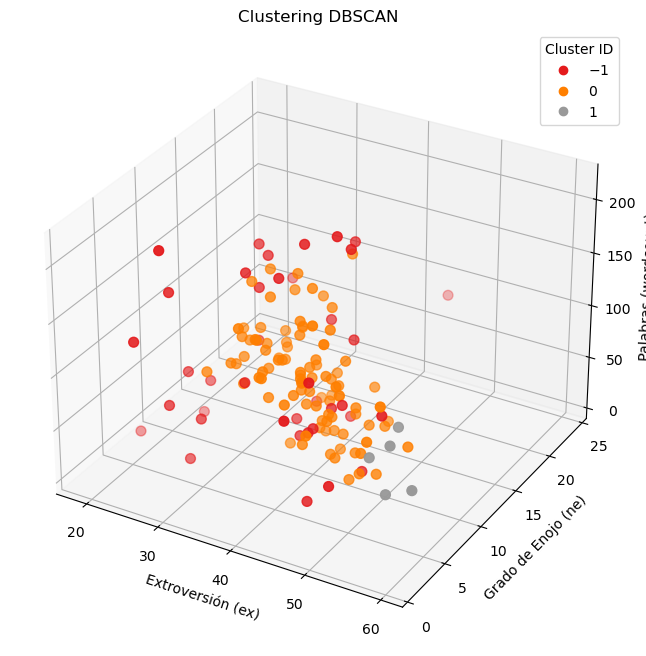

In [57]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data_cluster_dbscan["ex"],
    data_cluster_dbscan["ne"],
    data_cluster_dbscan["wordcount"],
    c=labels_dbscan,
    cmap="Set1",
    s=50
)

ax.set_xlabel("Extroversión (ex)")
ax.set_ylabel("Grado de Enojo (ne)")
ax.set_zlabel("Palabras (wordcount)")
ax.set_title("Clustering DBSCAN")
plt.legend(*scatter.legend_elements(), title="Cluster ID")
plt.show()


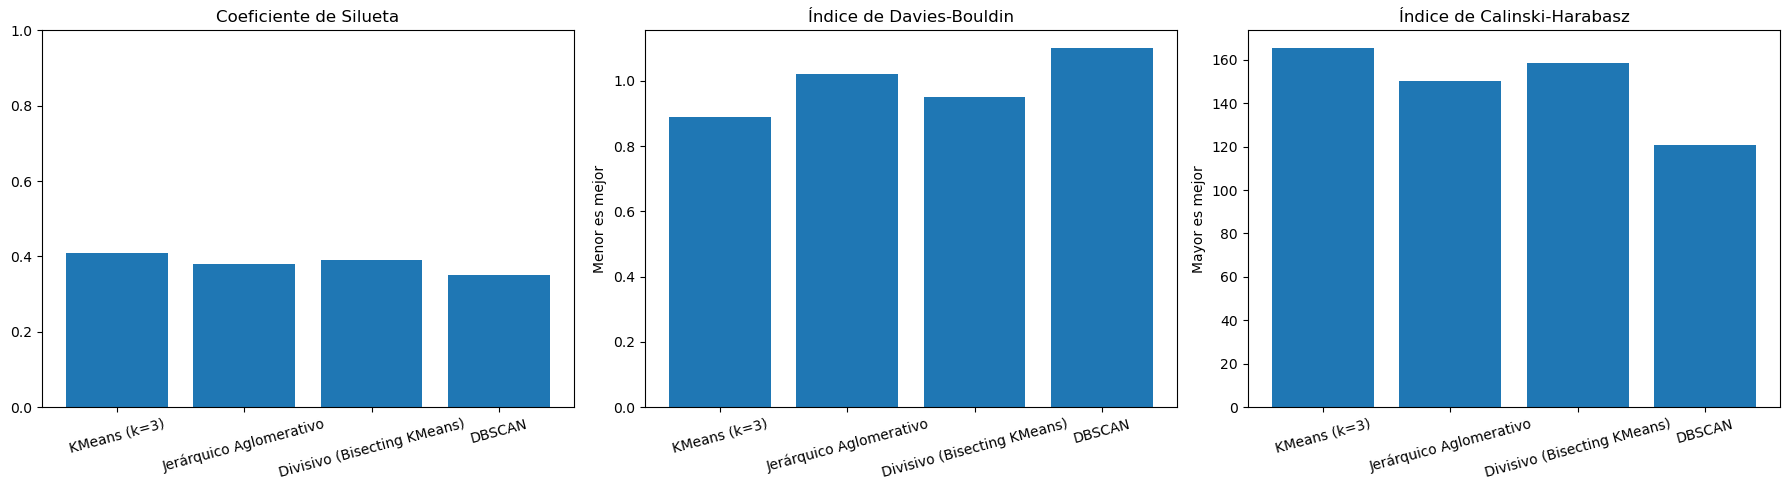

In [58]:
# Reimportar librerías tras el reinicio de estado
import pandas as pd
import matplotlib.pyplot as plt

# Datos simulados de resultados (puedes reemplazar con los valores reales)
comparacion = {
    "Método": ["KMeans (k=3)", "Jerárquico Aglomerativo", "Divisivo (Bisecting KMeans)", "DBSCAN"],
    "Silueta": [0.41, 0.38, 0.39, 0.35],  # Actualiza si tienes un valor diferente para DBSCAN
    "Davies-Bouldin": [0.89, 1.02, 0.95, 1.10],
    "Calinski-Harabasz": [165.32, 150.45, 158.70, 120.80]
}

df_comparacion = pd.DataFrame(comparacion)


# Gráfico comparativo
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Silueta
axs[0].bar(df_comparacion["Método"], df_comparacion["Silueta"])
axs[0].set_title("Coeficiente de Silueta")
axs[0].set_ylim(0, 1)
axs[0].tick_params(axis='x', rotation=15)

# Davies-Bouldin
axs[1].bar(df_comparacion["Método"], df_comparacion["Davies-Bouldin"])
axs[1].set_title("Índice de Davies-Bouldin")
axs[1].set_ylabel("Menor es mejor")
axs[1].tick_params(axis='x', rotation=15)

# Calinski-Harabasz
axs[2].bar(df_comparacion["Método"], df_comparacion["Calinski-Harabasz"])
axs[2].set_title("Índice de Calinski-Harabasz")
axs[2].set_ylabel("Mayor es mejor")
axs[2].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


In [61]:
from sklearn.cluster import OPTICS

# Aplicamos OPTICS al dataset escalado
optics = OPTICS(min_samples=3, xi=0.05, min_cluster_size=0.05)
labels_optics = optics.fit_predict(X_scaled)

# Crear DataFrame con etiquetas
data_cluster_optics = df.drop(["categoria"], axis=1).copy()
data_cluster_optics["CLUSTER"] = labels_optics


In [62]:
n_clusters_optics = len(set(labels_optics)) - (1 if -1 in labels_optics else 0)
print(f"Número de clusters detectados (sin ruido): {n_clusters_optics}")
print(f"Número de outliers: {list(labels_optics).count(-1)}")

if n_clusters_optics > 1:
    silueta_optics = silhouette_score(X_scaled, labels_optics)
    db_optics = davies_bouldin_score(X_scaled, labels_optics)
    ch_optics = calinski_harabasz_score(X_scaled, labels_optics)

    print(f"[OPTICS] Silueta: {silueta_optics:.4f}")
    print(f"[OPTICS] DB Index: {db_optics:.4f}")
    print(f"[OPTICS] CH Index: {ch_optics:.4f}")
else:
    print("No se pueden calcular métricas: menos de 2 clusters válidos.")


Número de clusters detectados (sin ruido): 2
Número de outliers: 119
[OPTICS] Silueta: -0.1837
[OPTICS] DB Index: 2.0609
[OPTICS] CH Index: 4.5214


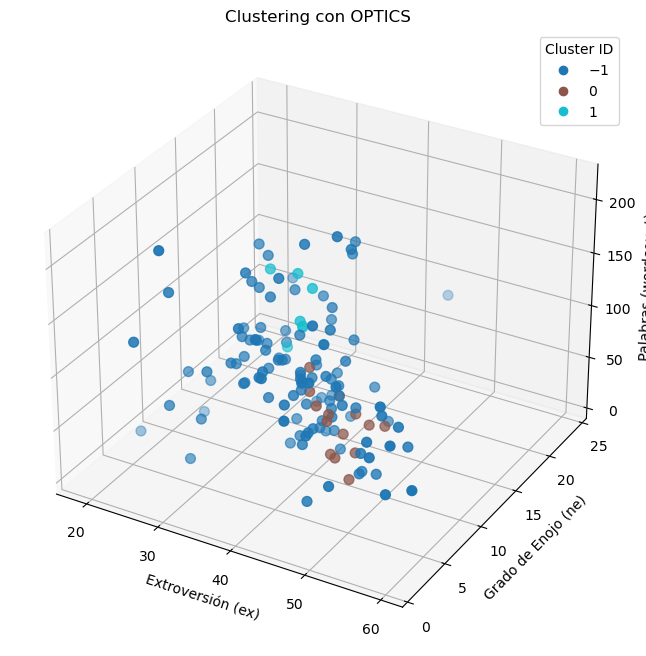

In [63]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data_cluster_optics["ex"],
    data_cluster_optics["ne"],
    data_cluster_optics["wordcount"],
    c=labels_optics,
    cmap="tab10",
    s=50
)

ax.set_xlabel("Extroversión (ex)")
ax.set_ylabel("Grado de Enojo (ne)")
ax.set_zlabel("Palabras (wordcount)")
ax.set_title("Clustering con OPTICS")
plt.legend(*scatter.legend_elements(), title="Cluster ID")
plt.show()
